# Summarizing the Data
- What are the distibutions of data?
- What is the individual wearing the fitbit like?
- Are there trends over time? days, weeks, months?

## Steps
- [x] univariate analysis
- [x] split into train and test data - 70% for train, 30% for test
- [ ] explore trends over time
- [ ] make conclusions on individual wearing the fitbit

In [1]:
import Prepare

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = Prepare.prep_data()

In [3]:
df.head()

,cals_burned,steps,dist,floors,mins_sedentary,mins_lightly_active,mins_fairly_active,mins_very_active,activity_cals,month,weekday
date,,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,4,Thursday
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,4,Friday
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,4,Saturday
2018-04-29,2851,1639,0.77,0,891,122,0,0,602,4,Sunday
2018-04-30,2825,1323,0.62,0,880,104,0,0,540,4,Monday


In [4]:
df.month.value_counts()

10    31
8     31
7     31
5     31
11    30
9     30
6     30
12     6
4      5
Name: month, dtype: int64

## Data ranges from the months of April to December
### April and December are not complete, have less than a week of data
#### What are the univariate distributions of the data like?

Text(0, 0.5, 'Count')

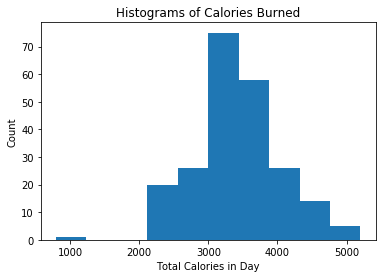

In [5]:
plt.hist(df.cals_burned)
plt.title('Histograms of Calories Burned')
plt.xlabel('Total Calories in Day')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

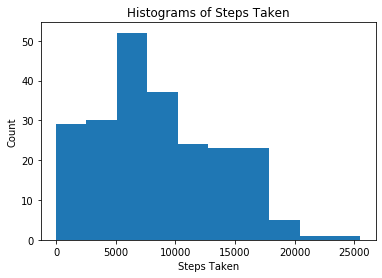

In [6]:
plt.hist(df.steps)
plt.title('Histograms of Steps Taken')
plt.xlabel('Steps Taken')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

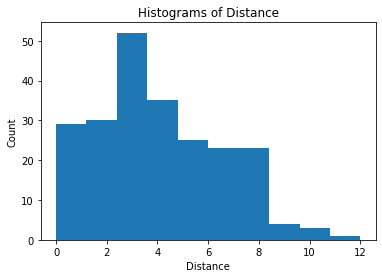

In [7]:
plt.hist(df.dist)
plt.title('Histograms of Distance')
plt.xlabel('Distance')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

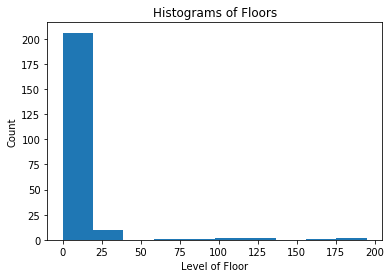

In [8]:
plt.hist(df.floors)
plt.title('Histograms of Floors')
plt.xlabel('Level of Floor')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

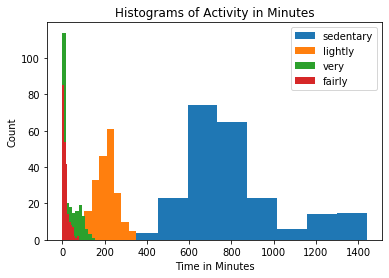

In [9]:
plt.hist(df.mins_sedentary)
plt.hist(df.mins_lightly_active)
plt.hist(df.mins_very_active)
plt.hist(df.mins_fairly_active)
plt.legend(['sedentary','lightly','very','fairly'])
plt.title('Histograms of Activity in Minutes')
plt.xlabel('Time in Minutes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

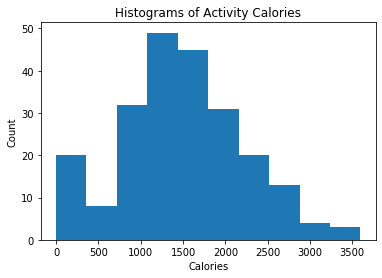

In [10]:
plt.hist(df.activity_cals)
plt.title('Histograms of Activity Calories')
plt.xlabel('Calories')
plt.ylabel('Count')

## Takeaways
- Calories burned 
    - ranges from 1000 to 5000
    - normally distributed at 2k - 5k
    - mode at 3k
- Steps taken
    - ranges from 0 to 25,000
    - mode at around 6k
- Distance
    - ranges from 0 to 12
    - could be miles?
    - mode at 3
- Floors
    - ranges from 0 to almost 200
    - seems to have outliers at the higher range
    - most at 0 to 25
- Minutes of Activity
    - most acitivty at sedentary level
    - sedentary and lightly are normally distributed
    - fairly and very have peaks at the beginning minutes
- Activity Calories
    - normally distributed
    - ranges from 0 to 3.5k
    - mode at about 1300

# Splitting the Data
- will split data into 70% for train and 30% for test
- data is already sorted by the date

In [11]:
# determining index for splitting the data
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)
print('index to split:',test_start_index)

index to split: 158


In [12]:
train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

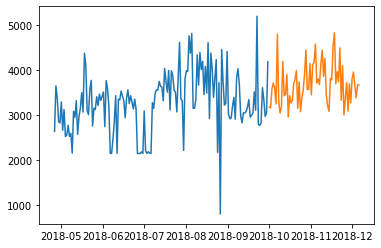

In [13]:
plt.plot(train.index, train.cals_burned)
plt.plot(test.index, test.cals_burned)

# Exploring Weekly Trends

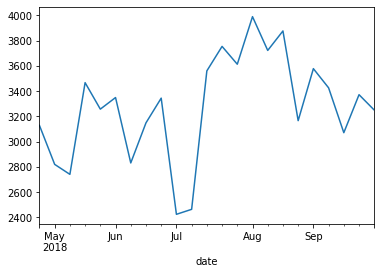

In [24]:
train.cals_burned.resample('W').mean().plot()

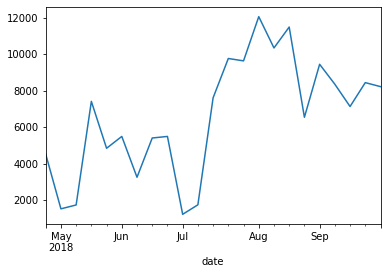

In [25]:
train.steps.resample('W').mean().plot()

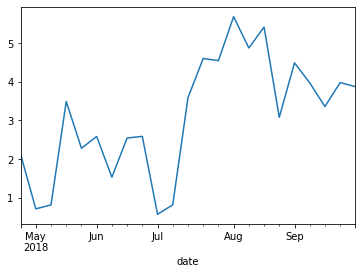

In [26]:
train.dist.resample('W').mean().plot()

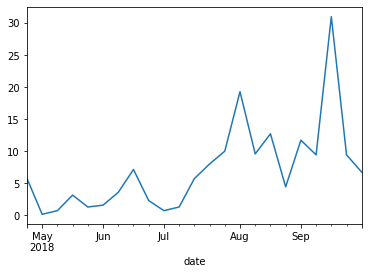

In [27]:
train.floors.resample('W').mean().plot()

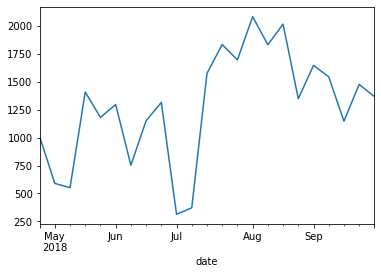

In [28]:
train.activity_cals.resample('W').mean().plot()

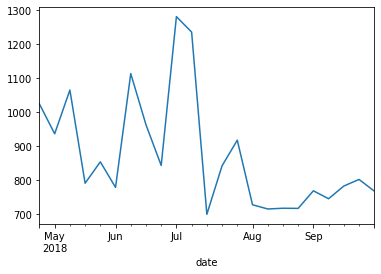

In [29]:
train.mins_sedentary.resample('W').mean().plot()

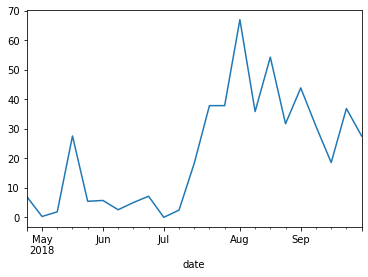

In [30]:
train.mins_very_active.resample('W').mean().plot()

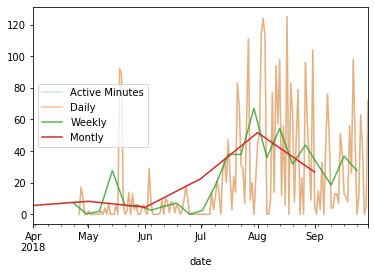

In [32]:
train.mins_very_active.plot(alpha=.2, label='Active Minutes')
train.mins_very_active.resample('D').mean().plot(alpha=.5, label='Daily')
train.mins_very_active.resample('W').mean().plot(alpha=.8, label='Weekly')
train.mins_very_active.resample('M').mean().plot(label='Montly')
plt.legend()